In [49]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow", 
    "purple", "orange", "pink", "cyan", 
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]

    for x in vecini_valizi:
        if x // 10 == i-1 and x % 10 == j:
            transitions[i][j] == 0.4
        else: transitions[i][j] = 0.6 / (len(vecini_valizi) - 1)

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
  
# Modelul HMM
model = hmm.CategoricalHMM(n_components=len(culori))
model.startprob_ = np.array([1/10] * 10)
model.transmat_ = transitions
model.emissionprob_ = emissions

# Rulăm algoritmul Viterbi pentru secvența de observații
secventa_stari = model.predict(X = observatii)

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare, 
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1), 
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

ValueError: transmat_ must have shape (n_components, n_components)

# Ex 2.1

Probabilitatea corectitudinii banului (medie): 0.5000


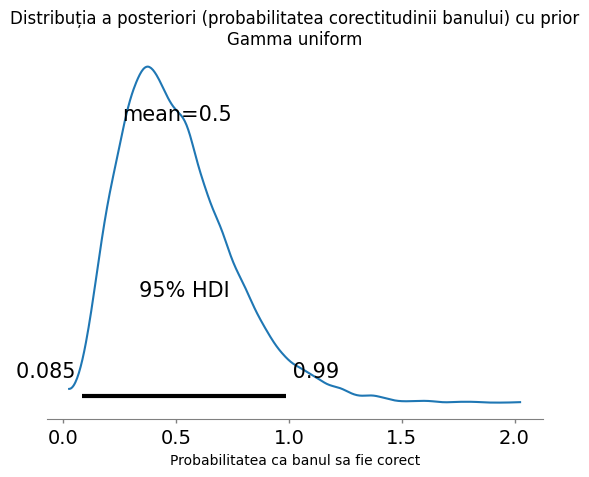

In [40]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

observatii_ban = ['s', 's', 'b', 'b', 's', 's', 's', 's', 'b', 's']

# Datele de intrare
k = 3 # Numărul total de aruncari ce rezulta in "ban"
n = 10 # aruncari

# Parametrii distributiei prior Gamma
alpha_prior = 1
beta_prior = 1
# alpha/beta = mean

# Functie distributie priori gamma
prior_pdf = stats.gamma(a=alpha_prior, scale=1/beta_prior)

# Parametrii distributiei posterior Gamma:
# p(θ|y) este o distributie de tip Beta, cu parametrii k + α si n - k + β
alpha_posterior = alpha_prior + k # 1 + 3 = 4
beta_posterior = beta_prior + n - k # 1 + 10 - 3 = 8

# Functie distributie posterior gamma
posterior_pdf = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)

mean_lambda = posterior_pdf.mean()
print(f"Probabilitatea corectitudinii banului (medie): {mean_lambda:.4f}")

lambda_samples = posterior_pdf.rvs(10000)
az.plot_posterior(lambda_samples, hdi_prob=0.95)
plt.title("Distribuția a posteriori (probabilitatea corectitudinii banului) cu prior Gamma uniform")
plt.xlabel("Probabilitatea ca banul sa fie corect")
plt.show()


# Ex 2.2 a)

Probabilitatea corectitudinii banului (medie): 1.0000


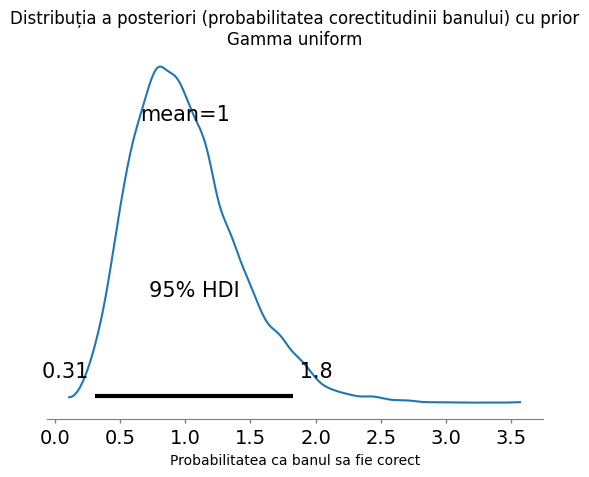

In [39]:
observatii_ban = ['b', 'b', 's', 'b', 's', 's', 'b', 's', 's', 'b']

# Datele de intrare
k = 5 # Numărul total de aruncari ce rezulta in "ban"
n = 10 # aruncari

# Parametrii distributiei prior Gamma
alpha_prior = 1
beta_prior = 1
# alpha/beta = mean

# Functie distributie priori gamma
prior_pdf = stats.gamma(a=alpha_prior, scale=1/beta_prior)

# Parametrii distributiei posterior Gamma:
# p(θ|y) este o distributie de tip Beta, cu parametrii k + α si n - k + β
alpha_posterior = alpha_prior + k # 1 + 5 = 6
beta_posterior = beta_prior + n - k # 1 + 10 - 3 = 8

# Functie distributie posterior gamma
posterior_pdf = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)

mean_lambda = posterior_pdf.mean()
print(f"Probabilitatea corectitudinii banului (medie): {mean_lambda:.4f}")

lambda_samples = posterior_pdf.rvs(10000)
az.plot_posterior(lambda_samples, hdi_prob=0.95)
plt.title("Distribuția a posteriori (probabilitatea corectitudinii banului) cu prior Gamma uniform")
plt.xlabel("Probabilitatea ca banul sa fie corect")
plt.show()

# Ex 2.2 b)

Probabilitatea corectitudinii banului (medie): 0.6923


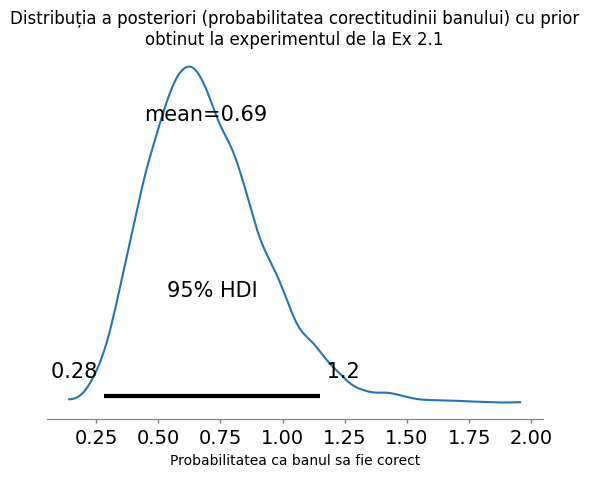

In [44]:
# Datele de intrare
k = 5 # Numărul total de aruncari ce rezulta in "ban"
n = 10 # aruncari

# Parametrii distributiei prior Gamma
alpha_prior = 4
beta_prior = 8
# alpha/beta = mean

# Functie distributie priori gamma
prior_pdf = stats.gamma(a = alpha_prior, scale = 1/beta_prior)

# Parametrii distributiei posterior Gamma:
# p(θ|y) este o distributie de tip Beta, cu parametrii k + α si n - k + β
alpha_posterior = alpha_prior + k # 1 + 5 = 6
beta_posterior = beta_prior + n - k # 1 + 10 - 3 = 8

# Functie distributie posterior gamma
posterior_pdf = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)

mean_lambda = posterior_pdf.mean()
print(f"Probabilitatea corectitudinii banului (medie): {mean_lambda:.4f}")

lambda_samples = posterior_pdf.rvs(10000)
az.plot_posterior(lambda_samples, hdi_prob=0.95)
plt.title("Distribuția a posteriori (probabilitatea corectitudinii banului) cu prior obtinut la experimentul de la Ex 2.1")
plt.xlabel("Probabilitatea ca banul sa fie corect")
plt.show()

Diferenta dintre cele doua rasare din faptul ca, pentru a), consideram distributia Gamma uniforma pentru ban - in alte cuvinte, presupunem banul ca find corect si nemasluit, in timp ce pentru b) consideram distributia rezulta de la 2.1, deci drept priori luam informatii unde banul era mai probabil sa fie masluit (cu 3 'b' si 7 's'), deci presupunem ca banul este masluit in calculul a posteriori.